In [1]:
import bluepysnap
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import numpy as np
import h5py 

In [2]:
color_ndam ='#009FFD'
color_met = '#FFA400'
color_layer= {1:'#1BE7FF',2:'#60992D',3: '#FED766',4: '#D76A03', 5: '#922D50',6: '#B0A3D4'}

color_etype__dict = {'bNAC': (0.6509803921568628, 0.807843137254902, 0.8901960784313725), 'bSTUT': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), 'cACint': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), 'cADpyr': (0.2, 0.6274509803921569, 0.17254901960784313), 'cNAC': (0.984313725490196, 0.6039215686274509, 0.6), 'cSTUT': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), 'dNAC': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), 'dSTUT': (1.0, 0.4980392156862745, 0.0)}

In [3]:
# Data Folder can be downloaded from 10.5281/zenodo.14187063
# Computed with the code Efel_features_extraction.py
met_features = pd.read_csv('./Data/Data_Efel/metabolism/Features_extraction_metabolism.csv') 

In [4]:
import ast 
def safe_convert_to_array(value):
    try:
        return np.array(ast.literal_eval(value))  # Convert string to array
    except:
        return value  # If conversion fails, return the value as it is

In [5]:
# Data Folder can be downloaded from 10.5281/zenodo.14187063
file_path = './Data/spikes_ndam_met_aged.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.drop(columns=['spikes_ndam','spikes_aged', 'spikes_met'], inplace=True)

In [6]:
# Merge the two DataFrames on the matching columns
result = met_features.merge(df[['ids', 'etype', 'layer']], left_on='Node_ID', right_on='ids', how='left')
# Drop the 'ids' column as it's no longer needed after the merge
result = result.drop(columns=['ids'])
# Apply the function safe_convert_to_array to 'etype' and 'layer' columns
result['AP_amplitude'] = [safe_convert_to_array(result['AP_amplitude'][i]).mean() for i in range(len(result['AP_amplitude']))]
result['peak_time'] = [safe_convert_to_array(result['peak_time'][i]) for i in range(len(result['AP_amplitude']))]

In [7]:
unique_etypes = np.unique(result['etype'])
palette = sns.color_palette("Paired", n_colors=len(unique_etypes))

# Create a dictionary mapping etypes to their corresponding colors
color_etype__dict = {etype: palette[i] for i, etype in enumerate(unique_etypes)}

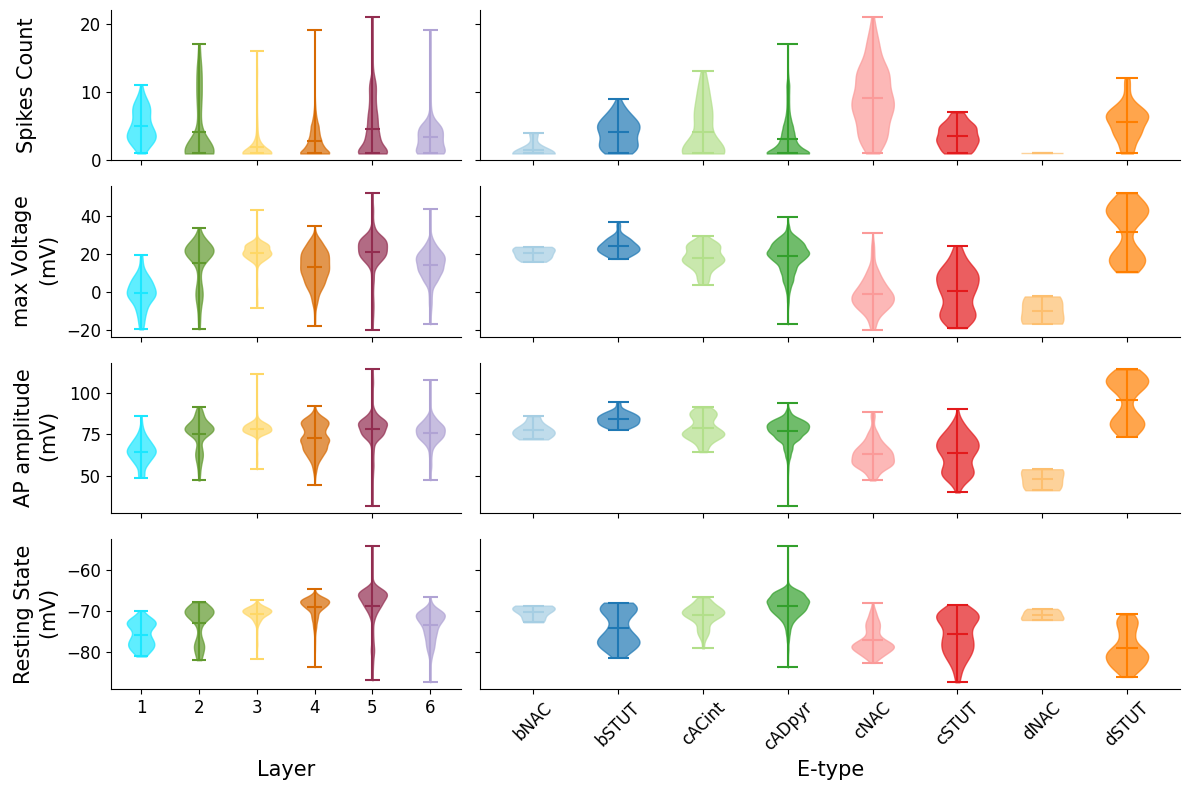

In [8]:
fig, axes = plt.subplots(4, 2,  figsize=(12, 8), gridspec_kw={'width_ratios': [1, 2]}, sharey='row')  # Adjusting figure size
axes = axes.flatten()

# Violin plot for 'layer' (left subplot)
dataset_layer = [result[result.layer == i]["spike_count"].values for i in np.unique(result['layer'])]
v1 = axes[0].violinplot(dataset_layer, points=100, positions=np.arange(0, len(dataset_layer)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the layer
for i, b in enumerate(v1['bodies']):
    layer_color = color_layer[i + 1]  # Get the color for this layer
    b.set_facecolor(layer_color)  # Set the fill color
    b.set_edgecolor(layer_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding layer colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v1[partname]
    vp.set_edgecolor(color_layer.values())  # Set the edge color for statistics

# Additional styling for the 'layer' plot
axes[0].set_ylabel('Spikes Count\n', fontsize=15)

# Violin plot for 'etype' (right subplot)
unique_etypes = np.unique(result['etype'])
dataset_etype = [result[result.etype == i]["spike_count"].values for i in unique_etypes]
v2 = axes[1].violinplot(dataset_etype, points=100, positions=np.arange(0, len(dataset_etype)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the etype
for i, b in enumerate(v2['bodies']):
    etype_color = list(color_etype__dict.values())[i]  # Get the color for this etype
    b.set_facecolor(etype_color)  # Set the fill color
    b.set_edgecolor(etype_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding etype colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v2[partname]
    vp.set_edgecolor(color_etype__dict.values())  # Set the edge color for statistics

axes[1].set_xticks([y for y in range(len(unique_etypes))], labels=unique_etypes, rotation=45)

################################################
# Violin plot for 'layer' (left subplot)
dataset_layer = [result[result.layer == i]["maximum_voltage"].values for i in np.unique(result['layer'])]
v1 = axes[2].violinplot(dataset_layer, points=100, positions=np.arange(0, len(dataset_layer)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the layer
for i, b in enumerate(v1['bodies']):
    layer_color = color_layer[i + 1]  # Get the color for this layer
    b.set_facecolor(layer_color)  # Set the fill color
    b.set_edgecolor(layer_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding layer colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v1[partname]
    vp.set_edgecolor(color_layer.values())  # Set the edge color for statistics

# Additional styling for the 'layer' plot
axes[2].set_ylabel('$\max$ Voltage\n$(\mathrm{mV})$', fontsize=15)

# Violin plot for 'etype' (right subplot)
unique_etypes = np.unique(result['etype'])
dataset_etype = [result[result.etype == i]["maximum_voltage"].values for i in unique_etypes]
v2 = axes[3].violinplot(dataset_etype, points=100, positions=np.arange(0, len(dataset_etype)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the etype
for i, b in enumerate(v2['bodies']):
    etype_color = list(color_etype__dict.values())[i]  # Get the color for this etype
    b.set_facecolor(etype_color)  # Set the fill color
    b.set_edgecolor(etype_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding etype colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v2[partname]
    vp.set_edgecolor(color_etype__dict.values())  # Set the edge color for statistics

################################################
# Violin plot for 'layer' (left subplot)
dataset_layer = [result[result.layer == i]["AP_amplitude"].values for i in np.unique(result['layer'])]
v1 = axes[4].violinplot(dataset_layer, points=100, positions=np.arange(0, len(dataset_layer)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the layer
for i, b in enumerate(v1['bodies']):
    layer_color = color_layer[i + 1]  # Get the color for this layer
    b.set_facecolor(layer_color)  # Set the fill color
    b.set_edgecolor(layer_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding layer colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v1[partname]
    vp.set_edgecolor(color_layer.values())  # Set the edge color for statistics



# Violin plot for 'etype' (right subplot)
unique_etypes = np.unique(result['etype'])
dataset_etype = [result[result.etype == i]["AP_amplitude"].values for i in unique_etypes]
v2 = axes[5].violinplot(dataset_etype, points=100, positions=np.arange(0, len(dataset_etype)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the etype
for i, b in enumerate(v2['bodies']):
    etype_color = list(color_etype__dict.values())[i]  # Get the color for this etype
    b.set_facecolor(etype_color)  # Set the fill color
    b.set_edgecolor(etype_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding etype colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v2[partname]
    vp.set_edgecolor(color_etype__dict.values())  # Set the edge color for statistics

axes[4].set_ylabel('AP amplitude\n$(\mathrm{mV})$', fontsize=15)
################################################
# Violin plot for 'layer' (left subplot)
dataset_layer = [result[result.layer == i]['steady_state_voltage_stimend'].values for i in np.unique(result['layer'])]
v1 = axes[6].violinplot(dataset_layer, points=100, positions=np.arange(0, len(dataset_layer)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the layer
for i, b in enumerate(v1['bodies']):
    layer_color = color_layer[i + 1]  # Get the color for this layer
    b.set_facecolor(layer_color)  # Set the fill color
    b.set_edgecolor(layer_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding layer colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v1[partname]
    vp.set_edgecolor(color_layer.values())  # Set the edge color for statistics



# Violin plot for 'etype' (right subplot)
unique_etypes = np.unique(result['etype'])
dataset_etype = [result[result.etype == i]['steady_state_voltage_stimend'].values for i in unique_etypes]
v2 = axes[7].violinplot(dataset_etype, points=100, positions=np.arange(0, len(dataset_etype)), 
                        showmeans=True, showmedians=False)

# Color the violins according to the etype
for i, b in enumerate(v2['bodies']):
    etype_color = list(color_etype__dict.values())[i]  # Get the color for this etype
    b.set_facecolor(etype_color)  # Set the fill color
    b.set_edgecolor(etype_color)  # Set the edge color
    b.set_alpha(0.7)

# Set colors for violin statistics marks based on their corresponding etype colors
for i, partname in enumerate(['cbars', 'cmins', 'cmaxes', 'cmeans']):
    vp = v2[partname]
    vp.set_edgecolor(color_etype__dict.values())  # Set the edge color for statistics

for i in range(8):
    axes[i].spines[['top']].set_visible(False)
    axes[i].spines[['right']].set_visible(False)
    axes[i].set_xticklabels([])
    axes[i].tick_params(axis='both', labelsize=12)


axes[6].set_xticks([y for y in range(len(np.unique(result['layer'])))], labels=np.unique(result['layer']))
axes[6].set_xlabel('Layer', fontsize=15)
axes[6].set_ylabel('Resting State\n$(\mathrm{mV})$', fontsize=15)


axes[7].set_xticks([y for y in range(len(unique_etypes))], labels=unique_etypes, rotation=45)
axes[7].set_xlabel('E-type', fontsize=15)

fig.align_ylabels(axes)
fig.align_xlabels(axes)

fig.tight_layout()

#plt.savefig("../Final_Figures/RESULTS/Figure4.pdf", format="pdf", bbox_inches='tight')

# Statistical Analysis per Layer

In [9]:
# Assuming your DataFrame is named 'df'
sample_size = result.groupby('layer').size()

# Display the sample sizes for each layer
print(sample_size)

layer
1      93
2     165
3     437
4    1277
5    1963
6     639
dtype: int64


In [10]:
# For the first table (steady_state_voltage_stimend and spike_count)
summary_stats_table1 = result.groupby('layer')[['steady_state_voltage_stimend', 'spike_count','maximum_voltage', 'AP_amplitude']].agg(['mean', 'std'])
# Table 1 (first two features)
latex_table1 = summary_stats_table1.to_latex(float_format="%.2f")

# Print both LaTeX tables
print("Table 1 LaTeX:")
print(latex_table1)


Table 1 LaTeX:
\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{steady_state_voltage_stimend} & \multicolumn{2}{r}{spike_count} & \multicolumn{2}{r}{maximum_voltage} & \multicolumn{2}{r}{AP_amplitude} \\
 & mean & std & mean & std & mean & std & mean & std \\
layer &  &  &  &  &  &  &  &  \\
\midrule
1 & -75.74 & 2.99 & 5.05 & 2.40 & -0.57 & 8.02 & 64.72 & 7.27 \\
2 & -72.85 & 4.22 & 4.15 & 4.63 & 15.39 & 12.10 & 75.35 & 9.44 \\
3 & -70.66 & 1.94 & 1.90 & 2.04 & 20.67 & 5.40 & 78.33 & 4.41 \\
4 & -69.11 & 2.58 & 2.75 & 2.12 & 13.01 & 9.11 & 72.84 & 8.74 \\
5 & -68.66 & 4.54 & 4.59 & 3.77 & 21.32 & 10.05 & 78.56 & 9.06 \\
6 & -73.47 & 3.36 & 3.45 & 2.57 & 14.16 & 8.22 & 75.97 & 7.15 \\
\bottomrule
\end{tabular}



In [11]:
from scipy.stats import shapiro

# Initialize a list to collect results
shapiro_results = []

# Loop through each variable and layer
for col in ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']:
    for layer in result['layer'].unique():
        group = result[result['layer'] == layer][col]
        stat, p_value = shapiro(group)
        
        # Determine normality based on p-value
        normality = "Not Normally Distributed" if p_value < 0.05 else "Normally Distributed"
        
        # Append the results to the list
        shapiro_results.append({
            "Feature": col,
            "Layer": layer,
            "p-value": f"{p_value:.3e}",  # Scientific notation for readability
            "Normality": normality
        })

# Convert the list to a DataFrame
shapiro_df = pd.DataFrame(shapiro_results)
print(shapiro_df)
# Display the LaTeX table
#print(shapiro_df.to_latex(index=False, caption="Shapiro-Wilk Test Results", label="tab:shapiro_test_results"))

                         Feature  Layer    p-value                 Normality
0                   AP_amplitude      6  9.284e-15  Not Normally Distributed
1                   AP_amplitude      4  1.278e-12  Not Normally Distributed
2                   AP_amplitude      5  1.904e-34  Not Normally Distributed
3                   AP_amplitude      3  4.831e-24  Not Normally Distributed
4                   AP_amplitude      1  2.425e-01      Normally Distributed
5                   AP_amplitude      2  1.522e-09  Not Normally Distributed
6   steady_state_voltage_stimend      6  5.770e-16  Not Normally Distributed
7   steady_state_voltage_stimend      4  9.754e-34  Not Normally Distributed
8   steady_state_voltage_stimend      5  2.803e-45  Not Normally Distributed
9   steady_state_voltage_stimend      3  5.786e-23  Not Normally Distributed
10  steady_state_voltage_stimend      1  4.447e-04  Not Normally Distributed
11  steady_state_voltage_stimend      2  3.245e-13  Not Normally Distributed

In [12]:
from scipy.stats import kruskal

# Initialize a list to collect results
kruskal_results = []

# Loop through each feature and perform the Kruskal-Wallis test across all layers
for col in ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']:
    # Create groups for each layer
    groups = [result[result['layer'] == layer][col] for layer in result['layer'].unique()]

    
    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Determine significance based on p-value
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    # Append the results to the list
    kruskal_results.append({
        "Feature": col,
        "H-statistic": f"{stat:.3f}",
        "p-value": f"{p_value:.3e}",  # Scientific notation for readability
        "Significance": significance
    })

# Convert the list to a DataFrame
kruskal_df = pd.DataFrame(kruskal_results)
print(kruskal_df)
# Display the LaTeX table
#print(kruskal_df.to_latex(index=False, caption="Kruskal-Wallis Test Results", label="tab:kruskal_test_results"))

                        Feature H-statistic     p-value Significance
0                  AP_amplitude     500.654  5.768e-106  Significant
1  steady_state_voltage_stimend    1454.953   0.000e+00  Significant
2                   spike_count     419.959   1.479e-88  Significant
3               maximum_voltage    1076.055  2.048e-230  Significant



Dunn's Test Results for AP_amplitude (Adjusted p-values):
     1      2     3      4      5    6
1  1.0  0.000  0.00  0.000  0.000  0.0
2  0.0  1.000  0.09  0.001  0.002  1.0
3  0.0  0.090  1.00  0.000  1.000  0.0
4  0.0  0.001  0.00  1.000  0.000  0.0
5  0.0  0.002  1.00  0.000  1.000  0.0
6  0.0  1.000  0.00  0.000  0.000  1.0

Summary of Significant Comparisons:
     1      2    3      4      5    6
1  NaN  0.000  0.0  0.000  0.000  0.0
2  0.0    NaN  NaN  0.001  0.002  NaN
3  0.0    NaN  NaN  0.000    NaN  0.0
4  0.0  0.001  0.0    NaN  0.000  0.0
5  0.0  0.002  NaN  0.000    NaN  0.0
6  0.0    NaN  0.0  0.000  0.000  NaN

Dunn's Test Results for steady_state_voltage_stimend (Adjusted p-values):
       1      2      3    4    5      6
1  1.000  0.001  0.000  0.0  0.0  0.078
2  0.001  1.000  0.058  0.0  0.0  0.162
3  0.000  0.058  1.000  0.0  0.0  0.000
4  0.000  0.000  0.000  1.0  0.0  0.000
5  0.000  0.000  0.000  0.0  1.0  0.000
6  0.078  0.162  0.000  0.0  0.0  1.000

Summary o

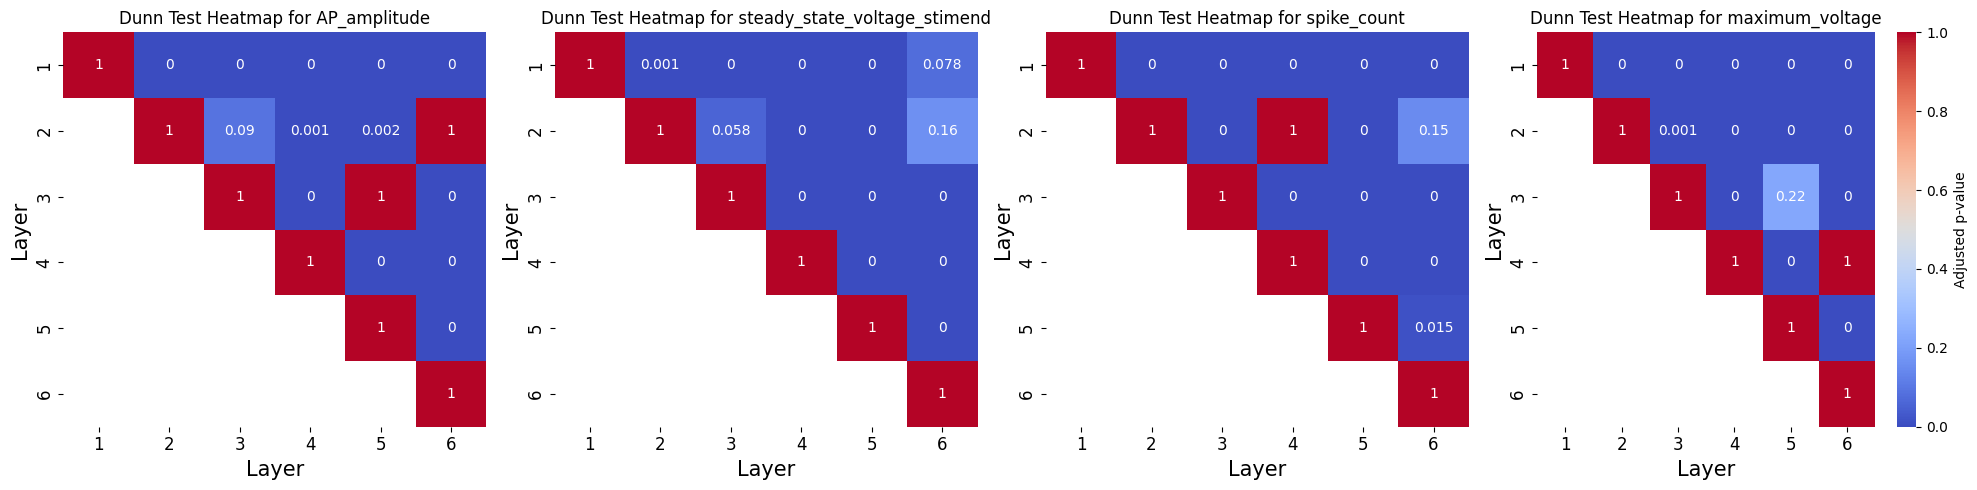

In [13]:
from scikit_posthocs import posthoc_dunn

# Define a function to create and return Dunn's results in a heatmap
def plot_dunn_heatmap(ax, data, feature, layers, is_last_plot=False):
    # Prepare the data for the Dunn's test
    dunn_data = data[['layer', feature]]
    
    # Perform Dunn's post-hoc test and adjust p-values (e.g., using Bonferroni)
    dunn_results = posthoc_dunn(dunn_data, val_col=feature, group_col='layer', p_adjust='bonferroni')
    dunn_results = dunn_results.round(3)  # Round to 3 decimal places

    # Print the Dunn's test results in a nicer format
    print(f"\nDunn's Test Results for {feature} (Adjusted p-values):")
    print(dunn_results)
    print("\nSummary of Significant Comparisons:")
    
    # Print only significant results (p-value < 0.05)
    significant_comparisons = dunn_results[dunn_results < 0.05]
    if not significant_comparisons.empty:
        print(significant_comparisons)
    else:
        print("No significant differences (p-value < 0.05) found.")

    # Convert the results to a matrix for the heatmap
    dunn_matrix = dunn_results.values
    dunn_matrix[np.tril_indices_from(dunn_matrix, -1)] = np.nan  # Mask lower triangle for clarity
    
    # Plot the heatmap on the provided axis (ax)
    sns.heatmap(dunn_matrix, annot=True, cmap='coolwarm', xticklabels=layers, yticklabels=layers,
                cbar=is_last_plot, cbar_kws={'label': 'Adjusted p-value'}, ax=ax, vmin=0, vmax=1)
    ax.set_title(f"Dunn Test Heatmap for {feature}")
    ax.set_xlabel("Layer", fontsize=15)
    ax.set_ylabel("Layer", fontsize=15)

    ax.tick_params(axis='both', labelsize=12)

# List of features and layers
features = ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']
layers = sorted(result['layer'].unique())  # Adjust this if layers are already sorted

# Create a figure with 4 subplots in a row
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust size as needed

# Loop through each feature and generate a heatmap on the corresponding axis
for i, feature in enumerate(features):
    # For the last plot, set `is_last_plot=True` to show the colorbar
    is_last_plot = (i == len(features) - 1)
    plot_dunn_heatmap(axes[i], result, feature, layers, is_last_plot)

plt.tight_layout()  # Adjust layout for better spacing
#plt.savefig("../Final_Figures/Supplementary_Figures/SF2.pdf", format="pdf", bbox_inches='tight')


# Statistical analysis based on E-type

In [14]:
# Assuming your DataFrame is named 'df'
sample_size = result.groupby('etype').size()

# Display the sample sizes for each layer
print(sample_size)

etype
bNAC         6
bSTUT       75
cACint      52
cADpyr    3886
cNAC       304
cSTUT      142
dNAC         4
dSTUT      105
dtype: int64


In [15]:
# For the first table (steady_state_voltage_stimend and spike_count)
summary_stats_table1 = result.groupby('etype')[['steady_state_voltage_stimend', 'spike_count', 'maximum_voltage', 'AP_amplitude']].agg(['mean', 'std'])

# Table 1 (first two features)
latex_table1 = summary_stats_table1.to_latex(float_format="%.2f")


# Print both LaTeX tables
print("Table 1 LaTeX:")
print(latex_table1)


Table 1 LaTeX:
\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{steady_state_voltage_stimend} & \multicolumn{2}{r}{spike_count} & \multicolumn{2}{r}{maximum_voltage} & \multicolumn{2}{r}{AP_amplitude} \\
 & mean & std & mean & std & mean & std & mean & std \\
etype &  &  &  &  &  &  &  &  \\
\midrule
bNAC & -70.28 & 1.61 & 1.50 & 1.22 & 20.42 & 3.07 & 77.46 & 4.86 \\
bSTUT & -74.16 & 4.20 & 4.09 & 2.09 & 24.05 & 4.05 & 84.23 & 3.73 \\
cACint & -70.98 & 2.65 & 4.17 & 3.66 & 18.08 & 6.26 & 78.81 & 7.16 \\
cADpyr & -68.83 & 2.92 & 3.17 & 2.74 & 18.82 & 7.86 & 76.98 & 6.71 \\
cNAC & -77.16 & 3.17 & 9.12 & 4.60 & -1.17 & 8.88 & 63.02 & 8.08 \\
cSTUT & -75.68 & 4.73 & 3.59 & 1.75 & 0.64 & 11.43 & 63.65 & 10.65 \\
dNAC & -71.05 & 1.32 & 1.00 & 0.00 & -10.06 & 6.94 & 48.41 & 6.18 \\
dSTUT & -79.09 & 4.24 & 5.64 & 2.56 & 31.84 & 13.75 & 95.69 & 13.33 \\
\bottomrule
\end{tabular}



In [16]:
from scipy.stats import shapiro

# Initialize a list to collect results
shapiro_results = []

# Loop through each variable and layer
for col in ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']:
    for etype in result['etype'].unique():
        group = result[result['etype'] == etype][col]
        stat, p_value = shapiro(group)
        
        # Determine normality based on p-value
        normality = "Not Normally Distributed" if p_value < 0.05 else "Normally Distributed"
        
        # Append the results to the list
        shapiro_results.append({
            "Feature": col,
            "Etype": etype,
            "p-value": f"{p_value:.3e}",  # Scientific notation for readability
            "Normality": normality
        })

# Convert the list to a DataFrame
shapiro_df = pd.DataFrame(shapiro_results)
print(shapiro_df)

                         Feature   Etype    p-value                 Normality
0                   AP_amplitude  cADpyr  5.117e-33  Not Normally Distributed
1                   AP_amplitude   dSTUT  9.460e-09  Not Normally Distributed
2                   AP_amplitude   cSTUT  1.235e-02  Not Normally Distributed
3                   AP_amplitude    cNAC  2.080e-07  Not Normally Distributed
4                   AP_amplitude  cACint  2.956e-03  Not Normally Distributed
5                   AP_amplitude    dNAC  3.407e-01      Normally Distributed
6                   AP_amplitude    bNAC  5.278e-01      Normally Distributed
7                   AP_amplitude   bSTUT  1.551e-01      Normally Distributed
8   steady_state_voltage_stimend  cADpyr  3.502e-35  Not Normally Distributed
9   steady_state_voltage_stimend   dSTUT  8.025e-06  Not Normally Distributed
10  steady_state_voltage_stimend   cSTUT  3.464e-05  Not Normally Distributed
11  steady_state_voltage_stimend    cNAC  4.054e-11  Not Normall

/gpfs/bbp.cscs.ch/home/sfarina/multiscale_kernel/lib/python3.8/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [17]:
from scipy.stats import kruskal

# Initialize a list to collect results
kruskal_results = []
print(result['etype'].unique())
# Loop through each feature and perform the Kruskal-Wallis test across all layers
for col in ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']:
    # Create groups for each layer
    groups = [result[result['etype'] == etype][col] for layer in ['cADpyr', 'dSTUT', 'cSTUT', 'cNAC', 'cACint', 'bSTUT']]

    
    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Determine significance based on p-value
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    # Append the results to the list
    kruskal_results.append({
        "Feature": col,
        "H-statistic": f"{stat:.3f}",
        "p-value": f"{p_value:.3e}",  # Scientific notation for readability
        "Significance": significance
    })

# Convert the list to a DataFrame
kruskal_df = pd.DataFrame(kruskal_results)
print(kruskal_df)

['cADpyr' 'dSTUT' 'cSTUT' 'cNAC' 'cACint' 'dNAC' 'bNAC' 'bSTUT']
                        Feature H-statistic    p-value     Significance
0                  AP_amplitude       0.000  1.000e+00  Not Significant
1  steady_state_voltage_stimend       0.000  1.000e+00  Not Significant
2                   spike_count       0.000  1.000e+00  Not Significant
3               maximum_voltage       0.000  1.000e+00  Not Significant



Dunn's Test Results for AP_amplitude (Adjusted p-values):
         bNAC  bSTUT  cACint  cADpyr  cNAC  cSTUT   dNAC  dSTUT
bNAC    1.000  0.197   1.000    1.00  0.06  0.192  0.228  0.068
bSTUT   0.197  1.000   0.000    0.00  0.00  0.000  0.000  1.000
cACint  1.000  0.000   1.000    1.00  0.00  0.000  0.006  0.000
cADpyr  1.000  0.000   1.000    1.00  0.00  0.000  0.010  0.000
cNAC    0.060  0.000   0.000    0.00  1.00  1.000  1.000  0.000
cSTUT   0.192  0.000   0.000    0.00  1.00  1.000  1.000  0.000
dNAC    0.228  0.000   0.006    0.01  1.00  1.000  1.000  0.000
dSTUT   0.068  1.000   0.000    0.00  0.00  0.000  0.000  1.000

Summary of Significant Comparisons:
        bNAC  bSTUT  cACint  cADpyr  cNAC  cSTUT   dNAC  dSTUT
bNAC     NaN    NaN     NaN     NaN   NaN    NaN    NaN    NaN
bSTUT    NaN    NaN   0.000    0.00   0.0    0.0  0.000    NaN
cACint   NaN    0.0     NaN     NaN   0.0    0.0  0.006    0.0
cADpyr   NaN    0.0     NaN     NaN   0.0    0.0  0.010    0.0
cNAC     NaN 

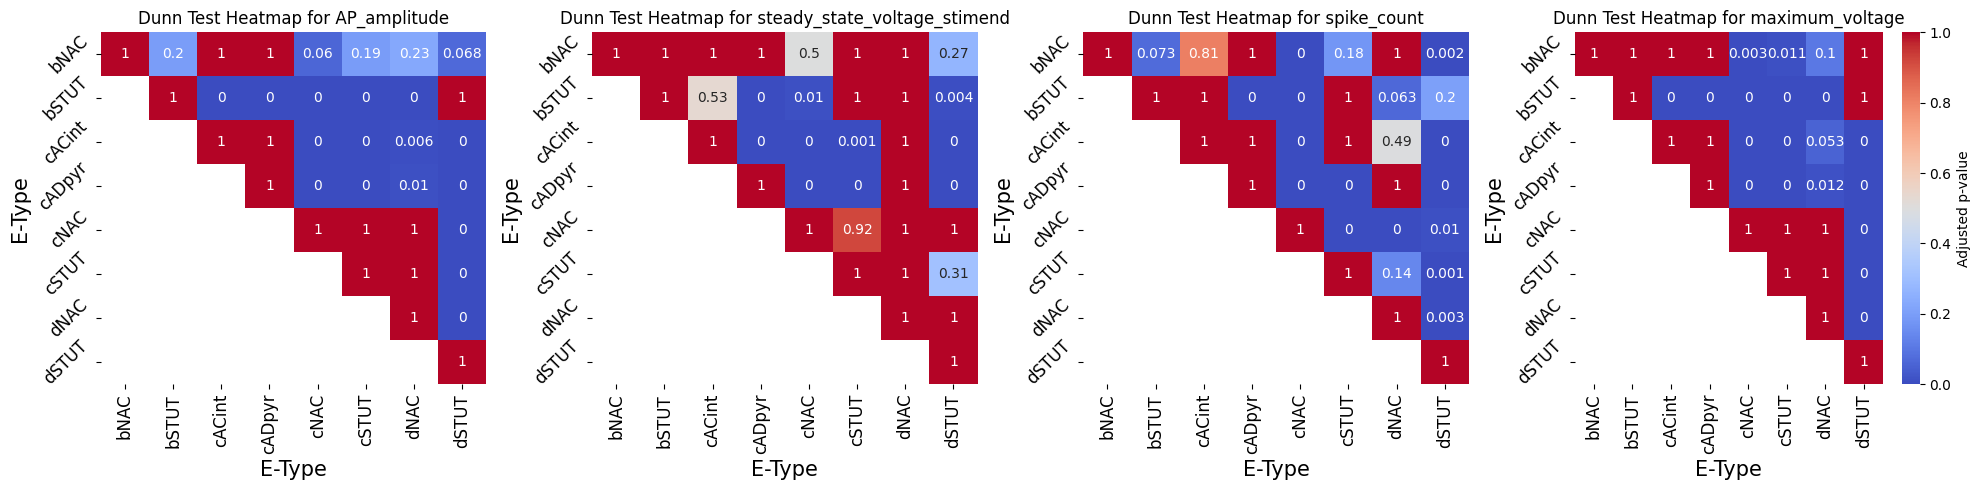

In [18]:
from scikit_posthocs import posthoc_dunn

def plot_dunn_heatmap(ax, data, feature, layers, is_last_plot=False):
    # Prepare the data for the Dunn's test
    dunn_data = data[['etype', feature]]
    
    # Perform Dunn's post-hoc test and adjust p-values (e.g., using Bonferroni)
    dunn_results = posthoc_dunn(dunn_data, val_col=feature, group_col='etype', p_adjust='bonferroni')
    dunn_results = dunn_results.round(3)  # Round to 3 decimal places
    
    # Print the Dunn's test results in a nicer format
    print(f"\nDunn's Test Results for {feature} (Adjusted p-values):")
    print(dunn_results)
    print("\nSummary of Significant Comparisons:")
    
    # Print only significant results (p-value < 0.05)
    significant_comparisons = dunn_results[dunn_results < 0.05]
    if not significant_comparisons.empty:
        print(significant_comparisons)
    else:
        print("No significant differences (p-value < 0.05) found.")
    
    # Convert the results to a matrix for the heatmap
    dunn_matrix = dunn_results.values
    dunn_matrix[np.tril_indices_from(dunn_matrix, -1)] = np.nan  # Mask lower triangle for clarity
    
    # Plot the heatmap on the provided axis (ax)
    sns.heatmap(dunn_matrix, annot=True, cmap='coolwarm', xticklabels=layers, yticklabels=layers,
                cbar=is_last_plot, cbar_kws={'label': 'Adjusted p-value'}, ax=ax, vmin=0, vmax=1)
    
    ax.set_title(f"Dunn Test Heatmap for {feature}")
    ax.set_xlabel("E-Type", fontsize=15)
    ax.set_ylabel("E-Type", fontsize=15)

    # Rotate the y-tick labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Adjust rotation angle and alignment

    ax.tick_params(axis='both', labelsize=12)

# List of features and layers
features = ['AP_amplitude', 'steady_state_voltage_stimend', 'spike_count', 'maximum_voltage']
layers = sorted(result['etype'].unique())  # Adjust this if layers are already sorted

# Create a figure with 4 subplots in a row
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust size as needed

# Loop through each feature and generate a heatmap on the corresponding axis
for i, feature in enumerate(features):
    # For the last plot, set `is_last_plot=True` to show the colorbar
    is_last_plot = (i == len(features) - 1)
    plot_dunn_heatmap(axes[i], result, feature, layers, is_last_plot)

plt.tight_layout()  # Adjust layout for better spacing
#plt.savefig("../Final_Figures/Supplementary_Figures/SF3.pdf", format="pdf", bbox_inches='tight')